# Прогноз отмены бронирования в отеле


**Заказчик** - сеть отелей «Как в гостях».

**Цель** - Необходимо  разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

**Входные данные от Заказчика**:

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.
В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня.

Стоимость номеров отеля:

 - категория A: за ночь — 1 000, разовое обслуживание — 400;
 - категория B: за ночь — 800, разовое обслуживание — 350;
 - категория C: за ночь — 600, разовое обслуживание — 350;
 - категория D: за ночь — 550, разовое обслуживание — 150;
 - категория E: за ночь — 500, разовое обслуживание — 150;
 - категория F: за ночь — 450, разовое обслуживание — 150;
 - категория G: за ночь — 350, разовое обслуживание — 150.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.

На разработку системы прогнозирования заложен бюджет — 400 000.

При этом необходимо учесть, что внедрение модели должно окупиться за год. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

Данные представлены в виде двух файлов:

- `/datasets/hotel_train.csv`-  данные для обучения модели.

- `/datasets/hotel_test.csv` - данные для тестирования модели.


**Описание данных**

В таблицах `hotel_train` и `hotel_test` содержатся одинаковые столбцы:

 -`id` — номер записи;
 
 -`adults` — количество взрослых постояльцев;
 
 -`arrival_date_year` — год заезда;
 
 -`arrival_date_month` — месяц заезда;
 
 -`arrival_date_week_number` — неделя заезда;
 
 -`arrival_date_day_of_month` — день заезда;
 
 -`babies` — количество младенцев;
 
 -`booking_changes` — количество изменений параметров заказа;
 
 -`children` — количество детей от 3 до 14 лет;
 
 -`country` — гражданство постояльца;
 
 -`customer_type` — тип заказчика:
 
 -`Contract` — договор с юридическим лицом;
 
 -`Group` — групповой заезд;
 
 -`Transient` — не связано с договором или групповым заездом;
 
 -`Transient-party` — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
 
 -`days_in_waiting_list` — сколько дней заказ ожидал подтверждения;
 
 -`distribution_channel` — канал дистрибуции заказа;
 
 -`is_canceled` — отмена заказа;
 
 -`is_repeated_guet` — признак того, что гость бронирует номер второй раз;
 
 -`lead_time` — количество дней между датой бронирования и датой прибытия;
 -`meal` — опции заказа:
 
 -`SC` — нет дополнительных опций;
 
 -`BB` — включён завтрак;
 
 -`HB` — включён завтрак и обед;
 
 -`FB` — включён завтрак, обед и ужин.
 
 -`previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;
 
 -`previous_cancellations` — количество отменённых заказов у клиента;
 
 -`required_car_parking_spaces` — необходимость места для автомобиля;
 
 -`reserved_room_type` — тип забронированной комнаты;
 
 -`stays_in_weekend_nights` — количество ночей в выходные дни;
 
 -`stays_in_week_nights` — количество ночей в будние дни;
 
 -`total_nights` — общее количество ночей;
 
 -`total_of_special_requests` — количество специальных отметок.

**План исследования:**

- *Изучение файлов с данными и Предобработка данных, Исследовательский анализ:*
     - Проверить данные и откорректировать их, если потребуется.
     - Провести исследовательский анализ представленных данных. Описать найденные особенности: пропуски, выбросы.
- *Выявить признаки «ненадёжного» клиента:*
     - На основе исследовательского анализа данных опишите клиента, склонного к отказу от брони.
- *Вычисление бизнес-метрики:*
     - Оценка прибыли отеля без внедрения депозитов.
- *Разработка модели ML:*
     - Обучение разных моделей и оценка их качества кросс-валидацией. Выбрать лучшую модель и проверить её на тестовой выборке. Описать выводы.
     - Выбрать метрику для обучения.
     - Оценить прибыль, которую принесёт выбранная модель за год.

- *Общий вывод:*
     - Описать модель, которая решает задачу с наибольшей выгодой для бизнеса. Дайть бизнесу рекомендации по результатам проделанной работы.


### Изучение файлов с данными и Предобработка данных


#### Изучение файлов с данными 


Начнем изучение наших данных с импортирования необходимых для выполнения исследования библиотек и распаковки файлов

In [1]:
# !pip install pandas_profiling --user

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas_profiling
from pandas_profiling import ProfileReport
from scipy import stats as st
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report
from pathlib import Path
import os
import urllib.request
import warnings
warnings.filterwarnings("ignore") 

In [4]:
df_train = pd.read_csv('/datasets/hotel_train.csv')
df_test = pd.read_csv('/datasets/hotel_test.csv')

Объединим две выборки в одну, чтобы облегчить исследовательский анализ

In [5]:
df1 = pd.concat([df_test, df_train], ignore_index=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97641 entries, 0 to 97640
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              97641 non-null  int64  
 1   is_canceled                     97641 non-null  int64  
 2   lead_time                       97641 non-null  float64
 3   arrival_date_year               97641 non-null  int64  
 4   arrival_date_month              97641 non-null  object 
 5   arrival_date_week_number        97641 non-null  int64  
 6   arrival_date_day_of_month       97641 non-null  int64  
 7   stays_in_weekend_nights         97641 non-null  int64  
 8   stays_in_week_nights            97641 non-null  int64  
 9   adults                          97641 non-null  float64
 10  children                        97641 non-null  float64
 11  babies                          97641 non-null  float64
 12  meal                            

In [6]:
df1

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97636,84057,0,23.0,2016,December,53,30,2,4,2.0,0.0,0.0,BB,CHN,TA/TO,0,0,0,D,0,0,Transient,0,2,6
97637,84063,0,53.0,2016,December,53,31,2,3,2.0,0.0,0.0,HB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,3,5
97638,84094,0,7.0,2016,December,53,31,2,4,2.0,0.0,0.0,BB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,1,6
97639,84117,0,17.0,2016,December,53,30,2,5,2.0,0.0,0.0,SC,FRA,TA/TO,0,0,0,A,0,0,Transient,0,1,7


In [7]:
pandas_profiling.ProfileReport(df1)

Проверим наличие дубликатов

In [8]:
df1.duplicated().sum()

0

**Вывод**

В ходе нашего исследования выявлено следующее:

В датасете всего 25 столбцов, из них 15 - целочисленных, 6 - категориальных и 4 столбца с вещественными типами данных.
Пропущенные значения и дубликаты в датасете отстутствуют. 

Необходимо изменить тип данных в столбцах `babies`, `children`, `lead_time`, `adults`  с вещественного на целое, `arrival_date_year `- дату.

В столбцах `babies`, `previous_cancellations`, `previous_bookings_not_canceled` перекос значений в сторону нуля:

`babies` - 0 младенцев у 99.4%, 1 младенец у 0,6%, максимальное значение 10 и 9 младенцев. Может и выброс, встречается такое единично, то возможно, что это была и группа младенцев, удалим в дальнейшем, чтобы не смущали.

`previous_cancellations` -  количество неотмененных заказов у клиента - 94%, отмененных 1 раз - 5.7%, максимально отменяли 26 раз - менее 0.1%

`previous_bookings_not_canceled` - количество подтвержденных заказов 97.3%. Максимально неподтвержденных - 0.2%.

`is_cancelled`: Отмена заказа в 37.5%. Неотмененных - 62.5%.

`lead_time` - максимальное  количество дней между датой бронирования и датой прибытия (больше 12 дней) - 82.1%.

`arrival_date_year`: исследование показывает, что в 2016 году заездов было больше, возможно, что данные за 2017 год неполные.
 - 2016 - 48%;
 - 2017 - 33.2 %;
 - 2015 - 18.8%
 
`arrival_date_month` -  самые популярные месяцы: май - 10.2%, август - 10%, апрель и июль по 9.9% и 9.6%.

`arrival_date_week_number` -  самые популярные недели года с 17 по 25 неделю.

`arrival_date_day_of_month` -  практически нет никакой разницы между числами месяца кроме 30- он наименее популярен.

`stays_in_weekend_nights` -  44.7% не бронируют ночи  в выходные дни, одну либо 2 ночи бронируют около 27%.

`stays_in_week_nights` - бронируют в большинстве своем от 1 до 4х ночей среди недели.

`adults` - взрослых от 2 чел бронируют 75%, от 1 - 20%. Встречаются брони с 0 значением взрослых (0.2%). Скорее всего это были группы детей, где взрослых оформляли отдельно.

`children` - без детей  от 3 до 14 лет бронируют в 94.3%, с 1 ребенком - 3.6%, с 2 - 2%.

`meal` - опции заказа: только завтрак(ВВ) выбирают в 78.2%. HB(завтра и обед) - 9.9%, FB(включён завтрак, обед и ужин) - 0.5%. А вот с SC(нет дополнительных опций) необходимо разобраться. Потому что обнаружено два значения. Возможно, что тех.ошибка записи.

`country` -  самые популярные гражданства постояльцев:
 - PRT - 39.7%;
 - FRA - 9.7%;
 - GBR - 9.3%;
 - ESP - 7%;
 - DEU - 6.4%.
 
`distribution_channel` - крупнейшими каналами распространения в процессе бронирования являются Туристические агентства и Туроператоры - 83.5%, далее следуют прямые бронирования - 10.7% и корпоративные - 5.6%.
 
`is_repeated_guest` - число повторных постояльцев всего 2.9%.

`reserved_room_type` -  самыми популярными являются типы комнат:
  - А - 75.8%;
  - D - 15.9%;
  - E - 4.2%.
  
`booking_changes` - ничего не меняли в параметрах бронирования 86% постояльцев, 1 раз - 9.9%, а максимально количество раз -14(менее 0.1%).
 
`days_in_waiting_list` - в 96.5% на ожидание подтверждения заказа не потребовалось ни дня. Максимальное ожидание (более 110 дней - 2.4%).

`customer_type` - тип заказчика:
 - Transient — не связано с договором или групповым заездом - 74.7%;
 - Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient - 21.6%;
 - Contract — договор с юридическим лицом - 3.2%;
 - Group — групповой заезд - 0.5%.

`required_car_parking_spaces` — необходимость места для автомобиля понадобилось только для 5.3%

`total_of_special_requests` - количество специальных отметок было отмечено только у 40.6% постояльцев.

`total_nights` - превалирует общее число заброннированных ночей в количестве 3 и 2 (24.6% и 24.1%), максимальное количество ночей было заказано  10 (0.2%).
 
 
 


#### Предобработка данных

Проверим, что за двойные значения в столбце `meal`

In [9]:
df1['meal'].unique()

array(['BB       ', 'HB       ', 'SC', 'FB       ', 'SC       '],
      dtype=object)

Почистим пробелы  и изменим тип данных сразу во всех выборках и проверим выборочно в одном из датафреймов

In [10]:
for df in df1, df_test, df_train:
    df2 = df[['meal', 'arrival_date_month', 'country',
              'distribution_channel', 'reserved_room_type', 'customer_type']]
    df[df2.columns] = df2.apply(lambda x: x.str.strip())
    df['adults'] = df['adults'].astype('Int64')
    df['children'] = df['children'].astype('Int64')
    df['babies'] = df['babies'].astype('Int64')
    df['lead_time'] = df['lead_time'].astype('Int64')

In [11]:
df1['meal'].unique()

array(['BB', 'HB', 'SC', 'FB'], dtype=object)

In [12]:
df_test.dtypes

id                                 int64
is_canceled                        int64
lead_time                          Int64
arrival_date_year                  int64
arrival_date_month                object
arrival_date_week_number           int64
arrival_date_day_of_month          int64
stays_in_weekend_nights            int64
stays_in_week_nights               int64
adults                             Int64
children                           Int64
babies                             Int64
meal                              object
country                           object
distribution_channel              object
is_repeated_guest                  int64
previous_cancellations             int64
previous_bookings_not_canceled     int64
reserved_room_type                object
booking_changes                    int64
days_in_waiting_list               int64
customer_type                     object
required_car_parking_spaces        int64
total_of_special_requests          int64
total_nights    

Удалим большие значения 9 и 10 в столбце `babies`

In [13]:
df_train = df_train.drop(df_train[(df_train.babies > 2)].index)
df_train['babies'].unique()

<IntegerArray>
[0, 1, 2]
Length: 3, dtype: Int64

Посмотрим на корреляцию значений.

<AxesSubplot:title={'center':'Correlations'}>

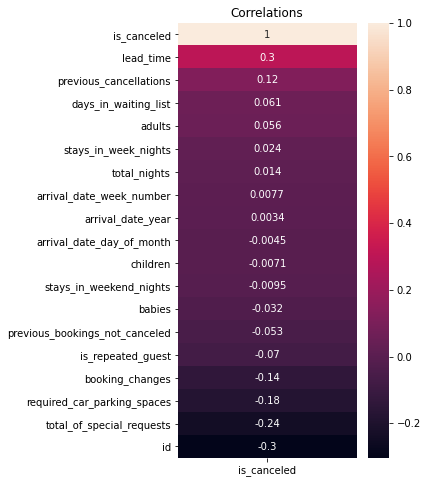

In [14]:
fig = plt.figure(figsize=(4,8))
plt.title('Correlations')
sns.heatmap(df1.corr()[['is_canceled']].sort_values('is_canceled', ascending=False),annot = True)

Приведенная выше корреляционная матрица показывает положительные или отрицательные взаимосвязи между ними.

`lead_time` показывает наиболее высокую корреляцию с нашей целью `is_canceled`.
 
  Незначительная корреляция может привести к неправильному прогнозированию или переоснащению. Чтобы предотвратить эту ситуацию, удалим некоторые столбцы в дальнейшем.



#### Исследовательский анализ. Выявление признаков «ненадёжного» клиента

**Исходя из всего выше описанного для выявления признаков «ненадёжного» клиента необходимо ответить на следующие вопросы:**
 - Склонны ли клиенты с детьми / младенцами чаще отказываться от услуг?
 - Клиенты, бронирующие через какой канал распространения, чаще всего отменяют бронирование?
 - Среди постоянных гостей, какова вероятность отмены бронирования?
 - Статистика отмены в зависимости от страны и предпочтений меню?
 - Тенденции отмены бронирования (влияет ли месяц, тип заказчика, тип комнаты, день недели)
 - Взаимосвязь между Особыми запросами и отменами бронирования
 - Влияет ли максимальное количество дней между датой бронирования и датой прибытия? 
 
 
 
Посмотрим на выбросы 

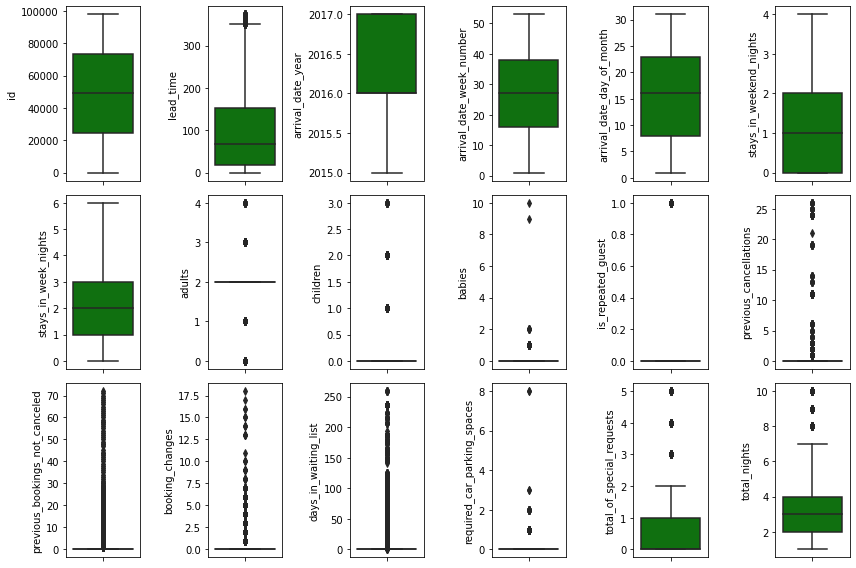

In [15]:
nums=[i for i in df1.columns if df1[i].dtypes != 'object' and i != 'is_canceled']
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df1[nums[i]], color='green', orient='v')
    plt.tight_layout()

Основываясь на приведенной выше визуализации:

Большинство наших данных имеют выбросы, за исключением `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month`
Все данные, которые имеют выбросы, были указаны с положительным искажением.

Выведем Топ-10 по гражданству клиентов

Text(0, 0.5, 'Count')

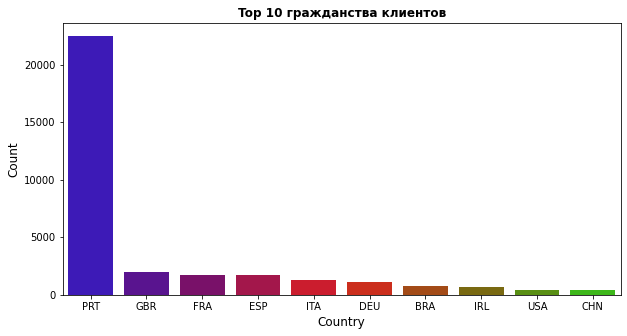

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', data=df1[df1['is_canceled'] == 1], 
              order=pd.value_counts(df1[df1['is_canceled'] == 1]['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 гражданства клиентов', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

Построим распределение признаков у тех, кто отменил бронь и тех, кто подтвердил.

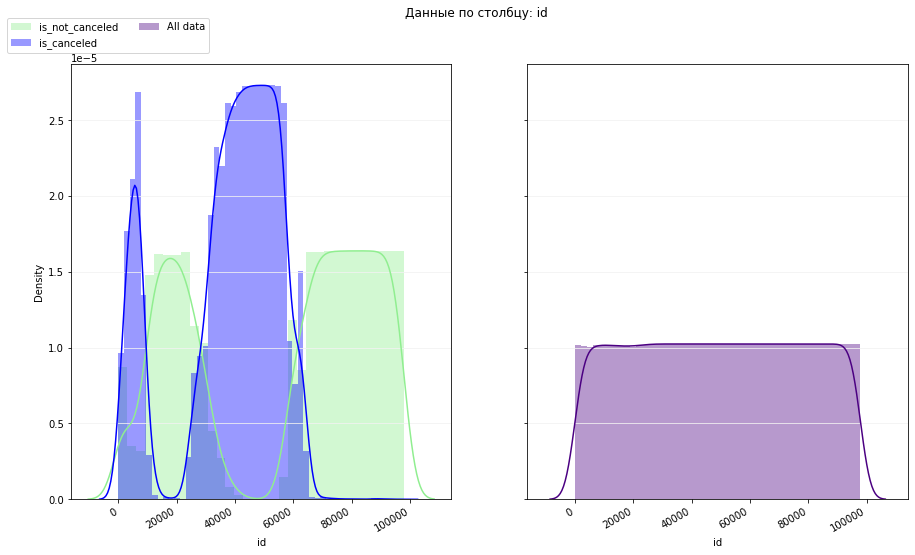

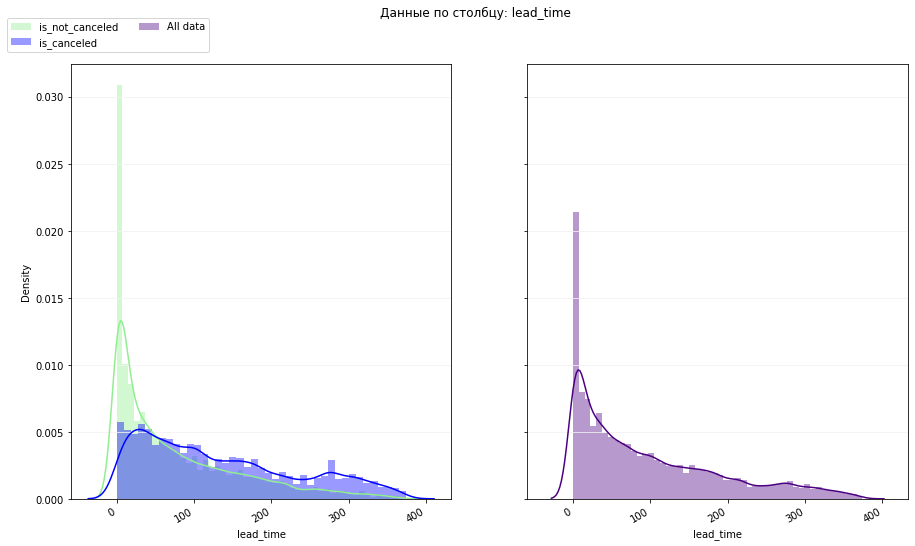

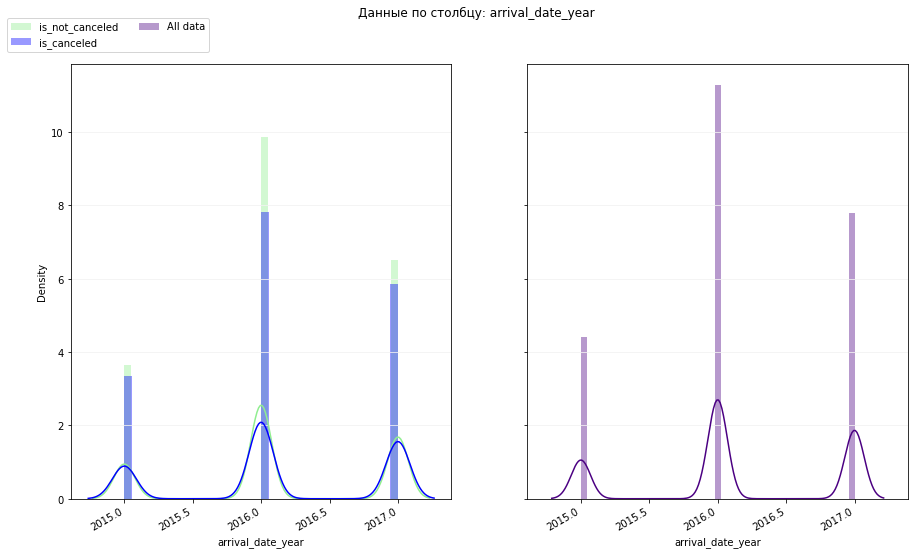

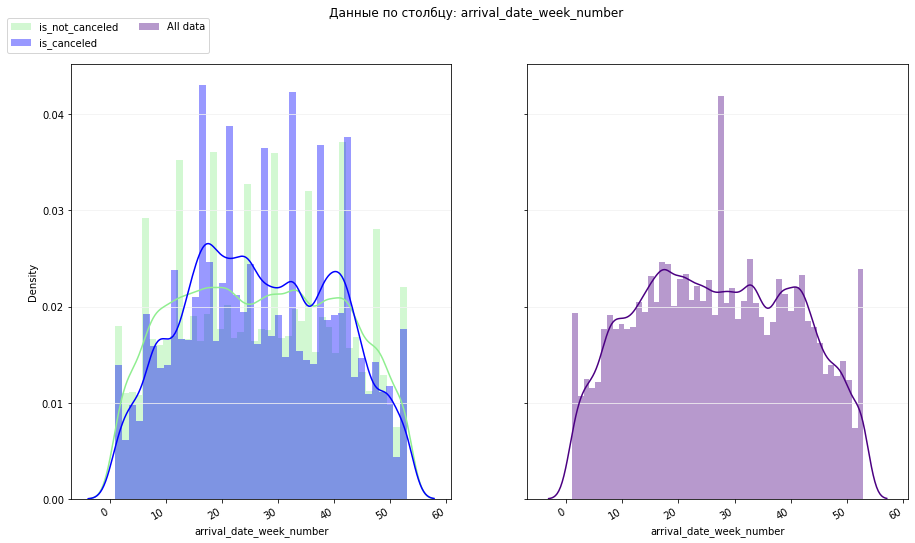

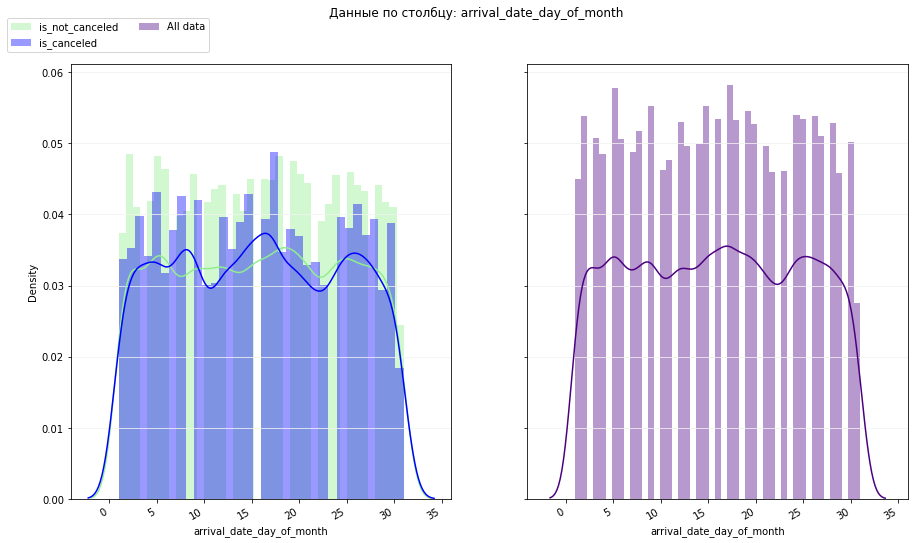

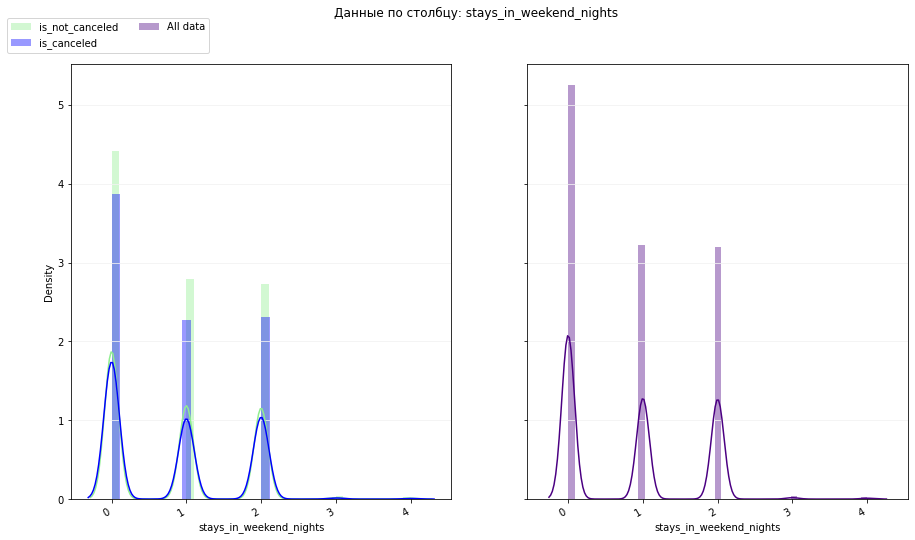

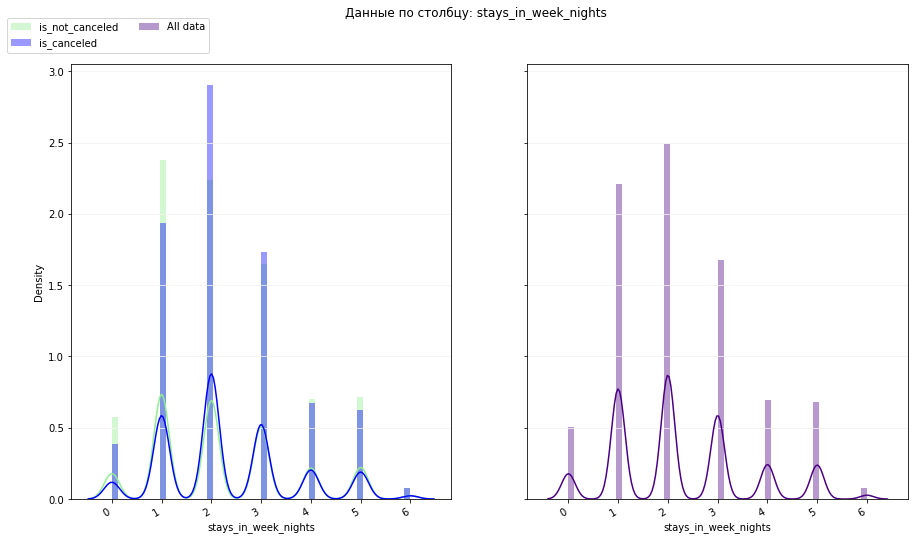

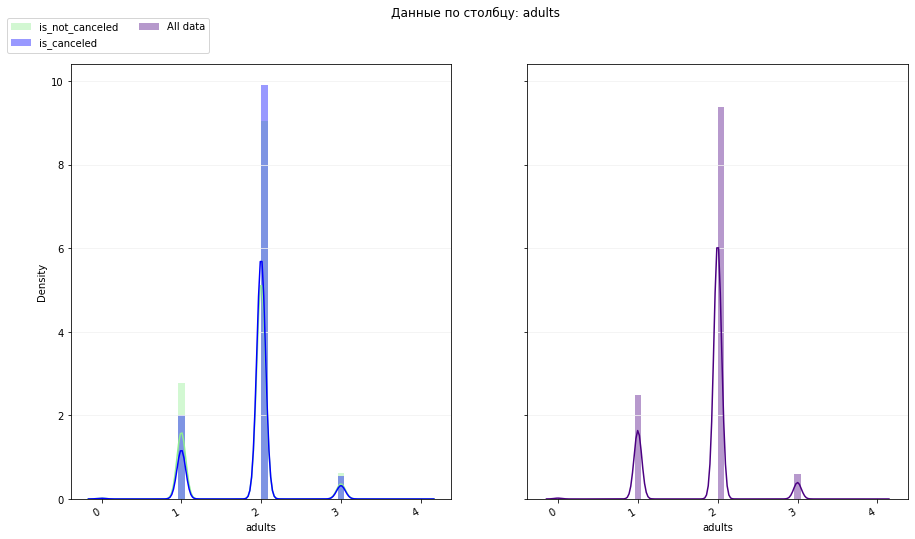

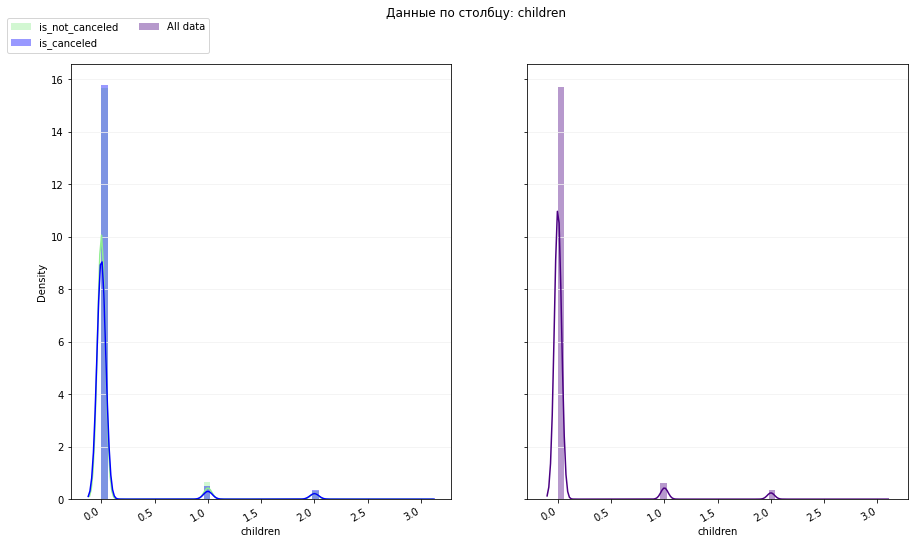

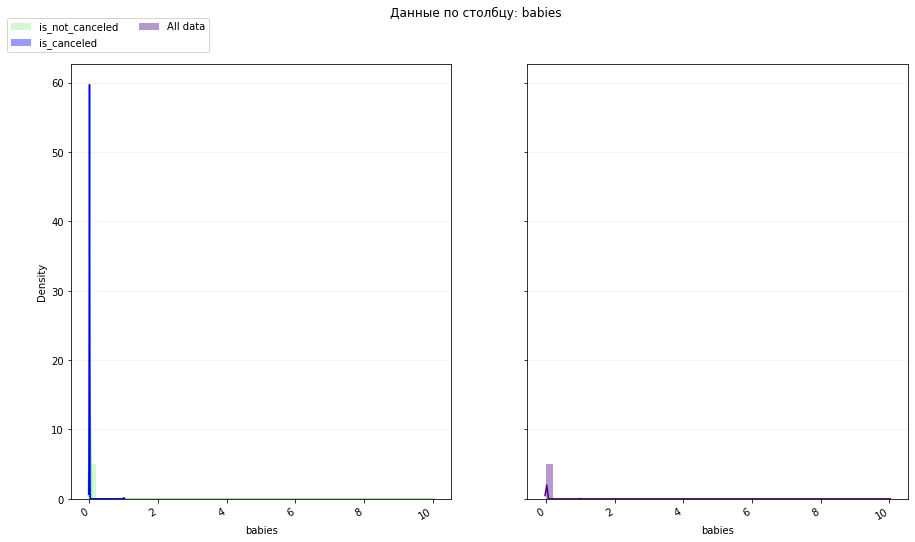

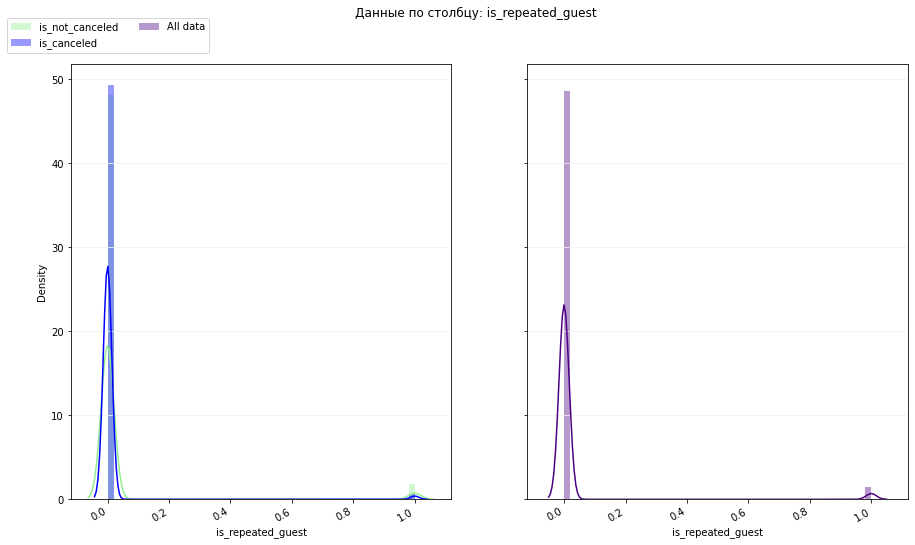

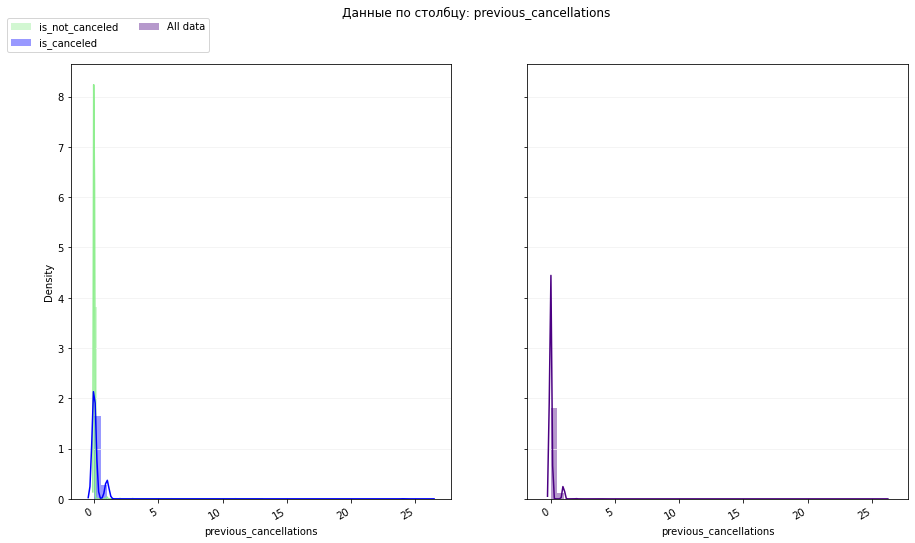

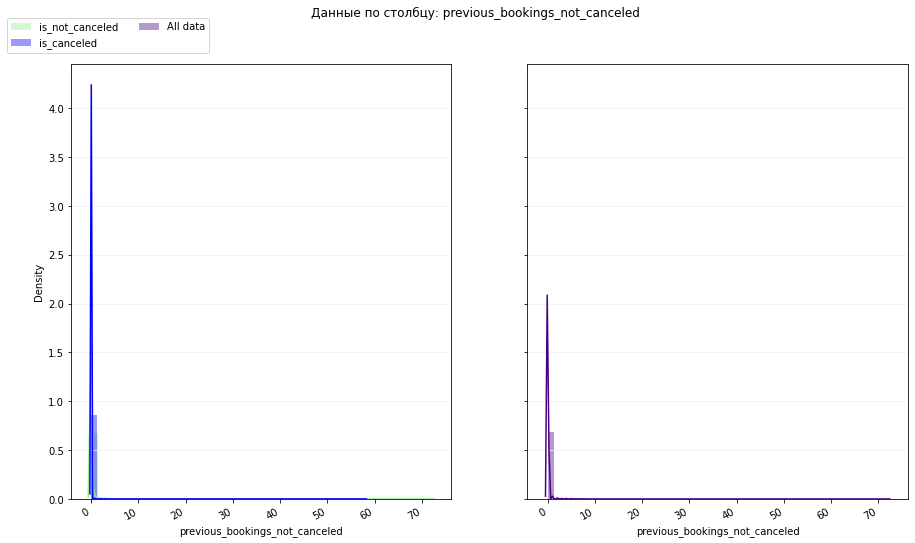

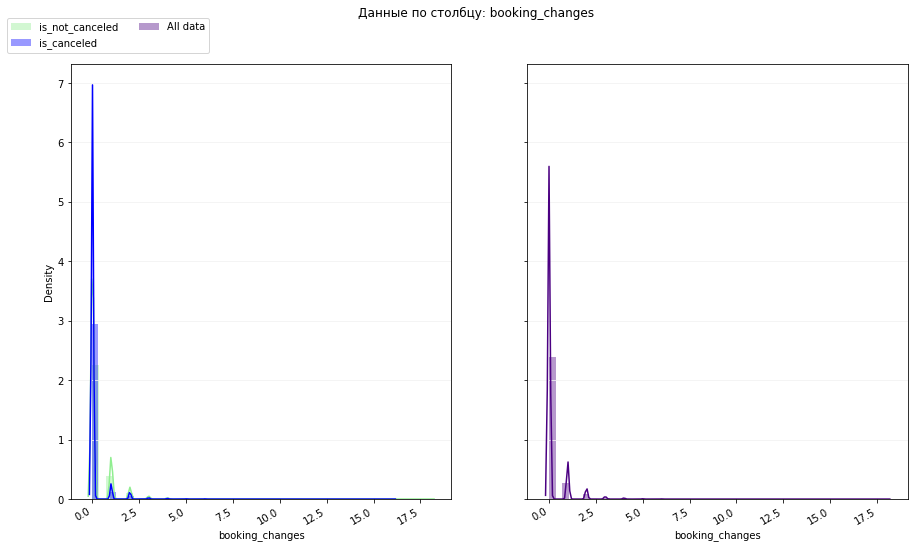

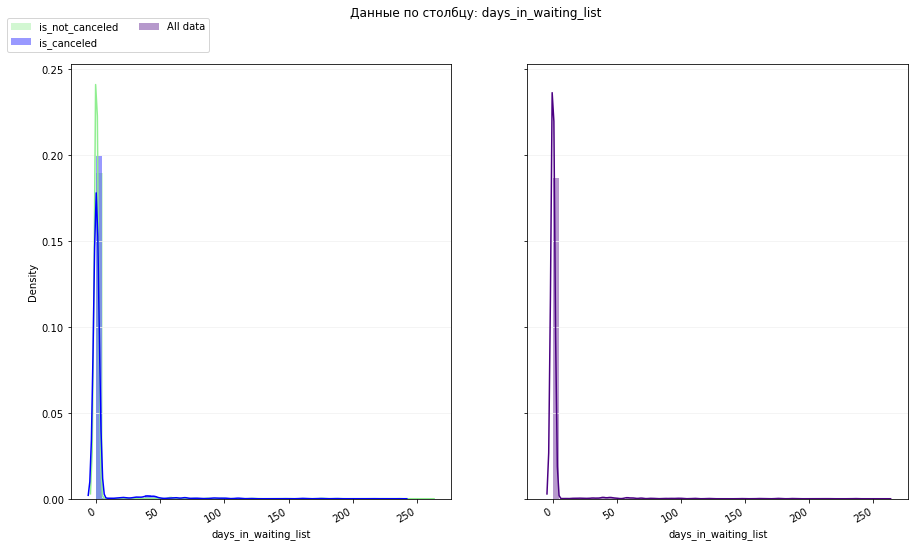

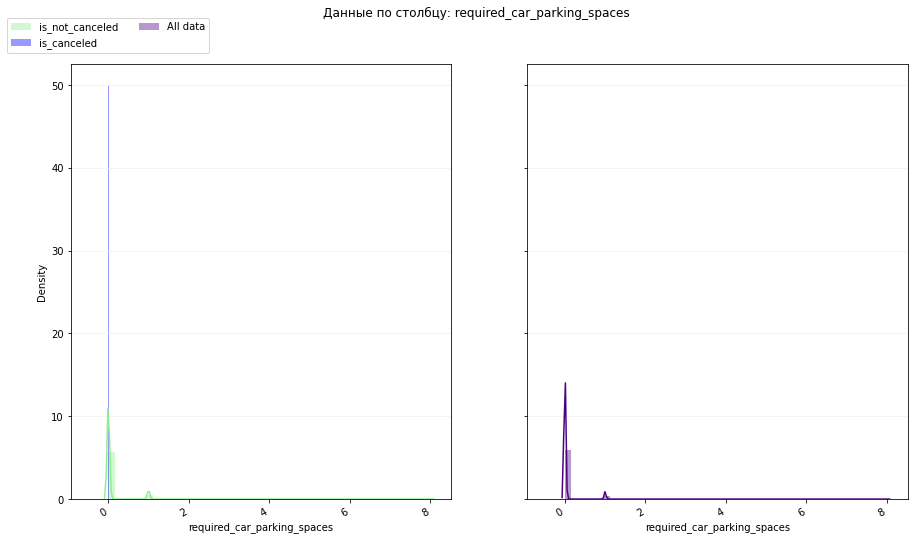

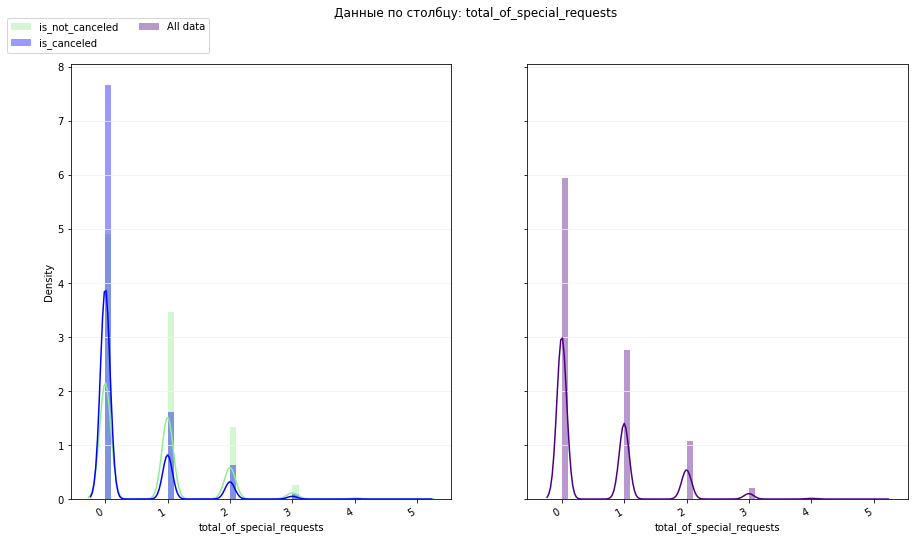

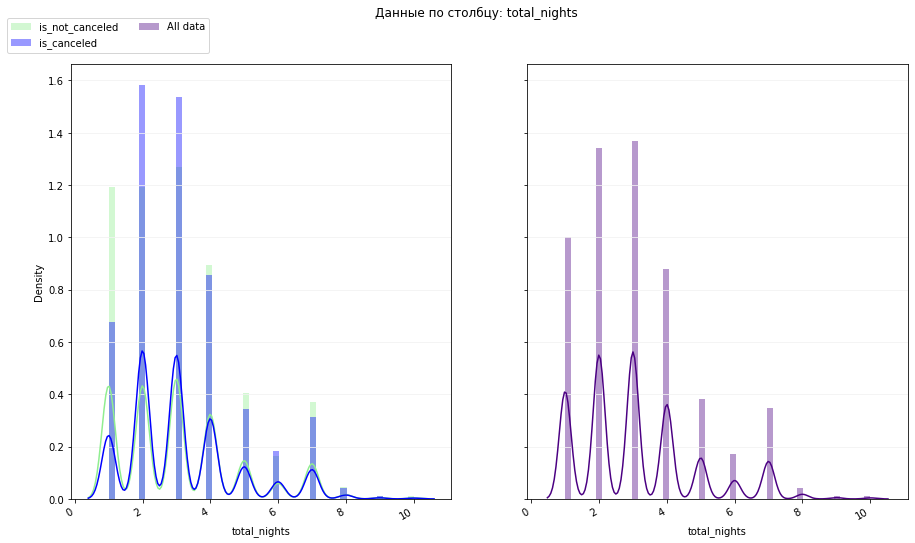

In [17]:
columns = df1.drop(['is_canceled', 'country', 'arrival_date_month', 'meal',
                    'customer_type', 'reserved_room_type', 'distribution_channel'], axis=1).columns
for col in columns:
   x1 = df1[df1['is_canceled'] == 0][col]
   x2 = df1[df1['is_canceled'] == 1][col]
   x3 = df1[col]

# plot
   fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True, sharex=True)
   fig.suptitle('Данные по столбцу: ' + col)

   sns.distplot(x1, color="lightgreen",
                ax=axes[0], label='is_not_canceled', kde=True)

   sns.distplot(x2, color="blue", ax=axes[0], label='is_canceled', kde=True)

   sns.distplot(x3, color="indigo", ax=axes[1], label='All data', kde=True)

   fig.legend(bbox_to_anchor=(0.066, 0.9),
              loc='lower left', ncol=2, borderaxespad=0.)
   axes[0].set(ylabel='Density')
   axes[0].grid(axis='y', color='0.95')
   axes[1].grid(axis='y', color='0.95')
   plt.setp(axes[0].get_xticklabels() +
            axes[1].get_xticklabels(), rotation=30, ha='right')
   plt.show()

Text(0, 0.5, 'Count')

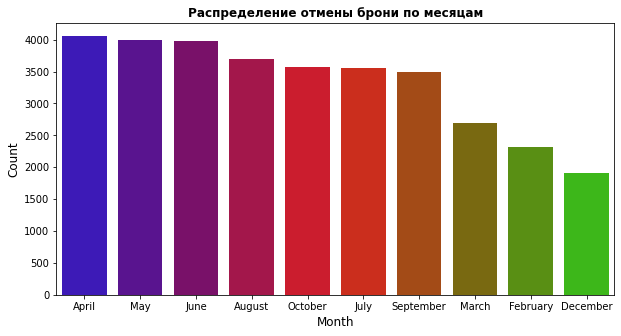

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='arrival_date_month', data=df1[df1['is_canceled'] == 1], 
              order=pd.value_counts(df1[df1['is_canceled'] == 1]['arrival_date_month']).iloc[:10].index, palette="brg")
plt.title('Распределение отмены брони по месяцам', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

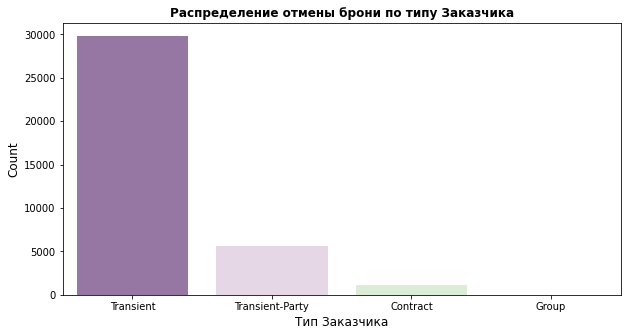

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='customer_type', data=df1[df1['is_canceled'] == 1], 
              order=pd.value_counts(df1[df1['is_canceled'] == 1]['customer_type']).iloc[:10].index, palette="PRGn")
plt.title('Распределение отмены брони по типу Заказчика', weight='bold')
plt.xlabel('Тип Заказчика', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

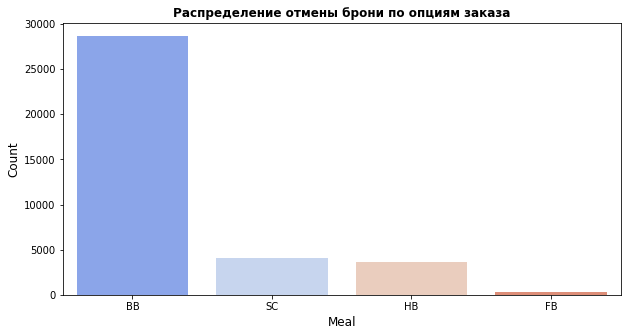

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='meal', data=df1[df1['is_canceled'] == 1], 
              order=pd.value_counts(df1[df1['is_canceled'] == 1]['meal']).iloc[:10].index, palette="coolwarm")
plt.title('Распределение отмены брони по опциям заказа', weight='bold')
plt.xlabel('Meal', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

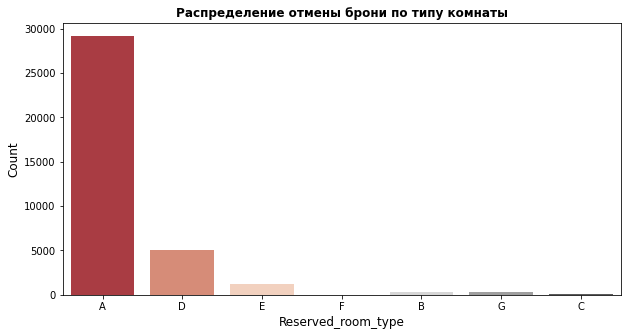

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='reserved_room_type', data=df1[df1['is_canceled'] == 1], 
              order=pd.value_counts(df1[df1['is_canceled'] == 1]['reserved_room_type']).iloc[:10].index, palette="RdGy")
plt.title('Распределение отмены брони по типу комнаты', weight='bold')
plt.xlabel('Reserved_room_type', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

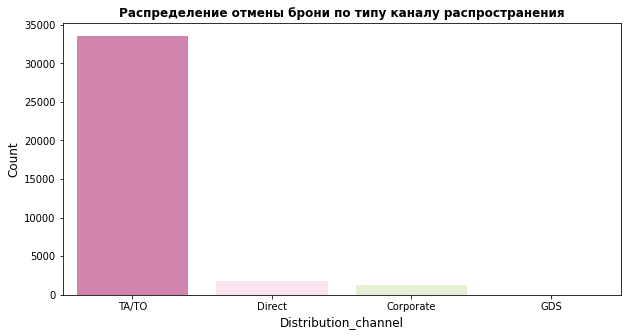

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='distribution_channel', data=df1[df1['is_canceled'] == 1], 
              order=pd.value_counts(df1[df1['is_canceled'] == 1]['distribution_channel']).iloc[:10].index, palette="PiYG")
plt.title('Распределение отмены брони по типу каналу распространения', weight='bold')
plt.xlabel('Distribution_channel', fontsize=12)
plt.ylabel('Count', fontsize=12)

**Вывод**

Отвечая на поставленные вопросы, мы по графикам  определили, какой постоялец склонен больше к отмене бронирования.

Это чаще всего непостоянный клиент с гражданством PRT, который  отменяет бронь в первые 50 дней между датой бронирования и датой прибытия. Не имеет детей в возрасте от 3 до 14 лет или младенцев. Бронь осуществляет на двух взрослых, в апреле, июне  или мае, без количества ночей на уикэнд, а среди недели выбирает чаще вторник, понедельник и среду в общей слложности от 2х до 4х ночей. Из меню предпочитает завтраки, а из комнат выбирает либо тип А либо тип D. Не бронирует место под автомобиль. Канал дистрибуции заказа выбирает TA/TO, а тип заказчика не связан с договором или групповым заездом. Специальные отметки чаще всего отсутствуют.



### Вычисление бизнес-метрики

Добавим в таблицы данные с типом комнаты, со стоимостью комнаты и её обслуживанию

In [23]:

dict_cleaning_cost = {'A': 400, 'B': 350, 'C': 350,
                  'D': 150, 'E': 150, 'F': 150, 'G': 150}
dict_room_cost = {'A': 1000, 'B': 800, 'C': 600,
              'D': 550, 'E': 500, 'F': 450, 'G': 350}
dict_coeff = {'January': 1.0, 'February': 1.0, 'March': 1.2, 'April': 1.2, 'May': 1.2, 'June': 1.4,
          'July': 1.4, 'August': 1.4, 'September': 1.2, 'October': 1.2, 'November': 1.2, 'December': 1.0}
df1['cleaning_cost'] = df1['reserved_room_type'].map(dict_cleaning_cost)
df1['room_cost'] = df1['reserved_room_type'].map(dict_room_cost)
df1['coeff'] = df1['arrival_date_month'].map(dict_coeff)

Создадим функцию для подсчёта прибыли и добавим в объединенный датасет 

In [24]:
def room_rev(row):

    if row['is_canceled'] == 0:
        return ((row['total_nights'] * row['room_cost']*row['coeff']) - ((row['total_nights']//2 + 1) * row['cleaning_cost']))
    else:
        return 0 - (row['room_cost']*row['coeff'])


# Применим функцию
df1['room_revenue'] = df1.apply(room_rev, axis=1)

Проверим выборочно

In [25]:
df1.sample(5)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,cleaning_cost,room_cost,coeff,room_revenue
55603,31131,0,43,2016,January,4,19,0,5,2,0,0,BB,ROU,TA/TO,0,0,0,A,1,0,Transient,0,1,5,400,1000,1.0,3800.0
92099,78358,0,51,2016,September,39,18,2,3,2,0,0,BB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,1,5,150,550,1.2,2850.0
67499,43027,1,305,2016,November,45,4,1,2,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,3,400,1000,1.2,-1200.0
43035,13176,0,100,2016,February,9,26,2,5,3,0,0,BB,GBR,TA/TO,0,0,0,A,2,0,Transient,0,1,7,400,1000,1.0,5400.0
51279,26807,1,65,2015,September,36,5,1,1,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,2,400,1000,1.2,-1200.0


Создадим сводную таблицу, чтобы посмотреть на валовую прибыль по годам

In [26]:
profit_per_year = (
df1[['room_revenue', 'arrival_date_year']]
        .pivot_table(index='arrival_date_year', values='room_revenue', aggfunc='sum')
        .sort_values('arrival_date_year', ascending=False)
)
profit_per_year

,room_revenue
arrival_date_year,
2017,36869720.0
2016,54538960.0
2015,20209310.0


**Вывод**

Добавили в датасеты данные с типом комнаты, со стоимостью комнаты и её обслуживанию. Вывели прибыль по годам с учётом убытков.


### Разработка модели ML:



Удалим столбцы, которые будут мешать построению модели

In [27]:
df_test1 = df_test.drop(['id', 'arrival_date_year'], axis=1)
df_train1 = df_train.drop(['id', 'arrival_date_year'], axis=1)

Обозначим целевые признаки target и остальные признаки features

In [28]:
features = df_train1.drop(['is_canceled'], axis=1)  # Признаки
target = df_train1['is_canceled']  # Целевой признак

Разобьем данные на две выборки: обучающую(75%) и валидационную (25%).

In [29]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [30]:
features_train

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
57081,10,August,33,13,2,1,2,0,0,BB,ESP,TA/TO,0,0,0,A,0,0,Transient,0,0,3
30381,142,July,29,12,0,5,2,0,0,BB,ITA,TA/TO,0,0,0,A,0,0,Transient,0,0,5
27154,96,May,20,12,2,3,2,0,0,BB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,1,5
54178,108,June,27,26,2,2,1,0,0,BB,NZL,TA/TO,0,0,0,D,0,0,Transient,0,1,4
34004,29,October,42,15,1,1,2,0,0,BB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19876,74,September,38,18,0,2,2,0,0,HB,PRT,TA/TO,0,0,0,A,0,0,Transient-Party,0,0,2
2177,29,December,50,10,0,3,2,0,0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient-Party,0,1,3
64799,3,December,52,23,2,2,2,0,0,BB,PRT,TA/TO,0,0,0,D,0,0,Transient,0,2,4
11749,8,April,16,14,0,3,2,1,0,HB,ESP,TA/TO,0,0,0,E,0,0,Transient,0,0,3


Выыделим количественные признаки для дальнейшего масштабирования и приведем к одному масштабу

In [31]:
# масштабирование
numeric = ['lead_time', 'arrival_date_week_number',
           'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'children', 'babies', 'previous_cancellations', 
           'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
           'required_car_parking_spaces', 'total_of_special_requests', 'total_nights']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
    
display(features_train.shape)
display(features_valid.shape)
display(target_train.shape)
display(target_valid.shape)

(48920, 22)

(16307, 22)

(48920,)

(16307,)

Избавляемся от категориальных признаков. Применение OneHotEncoder

In [32]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(features_train[['arrival_date_month', 'meal','country', 
                            'distribution_channel', 'reserved_room_type',
                            'customer_type']])
features_train_ohe = encoder.transform(features_train[['arrival_date_month', 
                                                   'meal','country', 
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'customer_type']]).toarray()
display(features_train_ohe)

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [33]:
features_valid_ohe = encoder.transform(features_valid[['arrival_date_month',
                                                   'meal','country', 
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'customer_type']]).toarray()
display(features_valid_ohe)

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

Преобразуем полученный массив в DataFrame

In [34]:
features_train_ohe_df = pd.DataFrame(features_train_ohe, columns=encoder.get_feature_names(['arrival_date_month',
                                                                                            'meal', 'country',
                                                                                            'distribution_channel',
                                                                                            'reserved_room_type',
                                                                                            'customer_type']), index=features_train.index)

features_train_ohe_df

,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GIB,country_GLP,country_GNB,country_GRC,country_GUY,country_HKG,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLT,country_MMR,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_NAM,country_NGA,country_NIC,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_POL,country_PRI,country_PRT,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
57081,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30381,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Преобразуем таблицу features_train, оставим столбцы, не участвовавшие в OHE.

In [35]:
features_train_no_ohe = features_train.drop(['arrival_date_month','meal',
                                             'country', 'distribution_channel',
                                             'reserved_room_type', 'customer_type'],
                                            axis=1) 
features_train_no_ohe

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
57081,-0.897204,0.123703,-0.326641,1.375561,-0.902824,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-0.028103
30381,0.475639,-0.172857,-0.440798,-0.967736,2.050397,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,1.123812
27154,-0.002776,-0.840117,-0.440798,1.375561,0.573786,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,0.648182,1.123812
54178,0.122028,-0.321137,1.157403,1.375561,-0.164519,-1.749186,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,0.648182,0.547854
34004,-0.699598,0.790962,-0.098326,0.203913,-0.902824,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,0.648182,-0.604061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19876,-0.231583,0.494402,0.244145,-0.967736,-0.164519,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-0.604061
2177,-0.699598,1.384082,-0.669112,-0.967736,0.573786,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,0.648182,-0.028103
64799,-0.970006,1.532362,0.814931,1.375561,-0.164519,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,1.980215,0.547854
11749,-0.918005,-1.136677,-0.212484,-0.967736,0.573786,0.337434,2.789263,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-0.028103


Объединим features_train_no_ohe и features_train_ohe_df.

In [36]:
features_train_ohe_sum = pd.concat((features_train_no_ohe, features_train_ohe_df), axis=1)
features_train_ohe_sum

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GIB,country_GLP,country_GNB,country_GRC,country_GUY,country_HKG,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLT,country_MMR,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_NAM,country_NGA,country_NIC,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_POL,country_PRI,country_PRT,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
57081,-0.897204,0.123703,-0.326641,1.375561,-0.902824,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-0.028103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30381,0.475639,-0.172857,-0.440798,-0.967736,2.050397,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,1.123812,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [37]:
features_valid_ohe_df = pd.DataFrame(features_valid_ohe,
                                     columns=encoder.get_feature_names(['arrival_date_month', 
                                                                        'meal', 'country',
                                                                        'distribution_channel',
                                                                        'reserved_room_type',
                                                                        'customer_type']), index=features_valid.index)

features_valid_ohe_df

,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GIB,country_GLP,country_GNB,country_GRC,country_GUY,country_HKG,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLT,country_MMR,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_NAM,country_NGA,country_NIC,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_POL,country_PRI,country_PRT,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
16235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42183,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Преобразуем таблицу features_valid, оставим столбцы, не участвовавшие в OHE

In [38]:
features_valid_no_ohe = features_valid.drop(['arrival_date_month','meal',
                                             'country', 'distribution_channel',
                                             'reserved_room_type', 'customer_type'],
                                            axis=1) 
features_valid_no_ohe

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
16235,-0.772400,1.384082,-0.897427,-0.967736,0.573786,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-0.028103
42183,0.423638,-1.952217,1.271560,-0.967736,-0.164519,-1.749186,-0.222629,-0.083795,0,0.889359,-0.080159,-0.325135,2.321132,-0.244717,-0.683852,-0.604061
2685,-0.231583,-1.655657,1.157403,0.203913,-0.164519,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-0.028103
65226,-0.928405,1.606502,1.728189,1.375561,1.312091,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,0.648182,1.699770
39156,2.493303,0.494402,0.244145,-0.967736,-0.164519,0.337434,-0.222629,-0.083795,0,0.889359,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-0.604061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20243,-0.418789,0.568542,1.043246,1.375561,-0.164519,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,0.547854
40277,-1.001207,0.494402,0.015831,-0.967736,-0.902824,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-1.180019
15748,-0.886804,1.161662,0.129988,-0.967736,-0.902824,-1.749186,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-1.180019
54134,-0.044377,-0.321137,1.157403,1.375561,-0.902824,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,0.648182,-0.028103


Объединим features_valid_no_ohe и features_valid_ohe_df

In [39]:
features_valid_ohe_sum = pd.concat((features_valid_no_ohe, features_valid_ohe_df), axis=1)
features_valid_ohe_sum

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GIB,country_GLP,country_GNB,country_GRC,country_GUY,country_HKG,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLT,country_MMR,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_NAM,country_NGA,country_NIC,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_POL,country_PRI,country_PRT,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
16235,-0.772400,1.384082,-0.897427,-0.967736,0.573786,0.337434,-0.222629,-0.083795,0,-0.134273,-0.080159,-0.325135,-0.183328,-0.244717,-0.683852,-0.028103,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42183,0.423638,-1.952217,1.271560,-0.967736,-0.164519,-1.749186,-0.222629,-0.083795,0,0.889359,-0.080159,-0.325135,2.321132,-0.244717,-0.683852,-0.604061,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Обучим разные модели и оценим их качество кросс-валидацией. 

**DecisionTree**

In [40]:
best_depth_dt = 0
for depth in range(1,30, 2):
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    result_dt = cross_val_score(tree_model, features_train_ohe_sum, target_train, cv=5, scoring='f1') 
    final_result_dt = sum(result_dt) / len(result_dt)
    best_depth_dt = depth

print('Наилучшее качество модели {:.2f} с максимальной глубиной {}'.format(
    final_result_dt, best_depth_dt))

Наилучшее качество модели 0.79 с максимальной глубиной 29


**RandomForest**

In [ ]:
best_est_rf = 0
best_depth_rf = 0
for est in range(10, 20, 10):
    for depth in range(1, 20, 2):

        rf_model = RandomForestClassifier(
            random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        
        result_rf = cross_val_score(rf_model, features_train_ohe_sum, target_train, cv=5, scoring='f1')
        final_result_rf = sum(result_rf) / len(result_rf)
        best_est_rf = est
        best_depth_rf = depth

print('Наилучшее качество модели {:.2f} при количестве деревьев {} с максимальной глубиной {}'.format(
    final_result_rf, best_est_rf, best_depth_rf))

**LogisticRegression**

In [ ]:
lr_model = LogisticRegression(
    random_state=12345, solver='liblinear', class_weight='balanced')
lr_result = cross_val_score(lr_model, features_train_ohe_sum, target_train, cv=5, scoring='f1')
final_result_lr = sum(lr_result) / len(lr_result)
print('Наилучшее качество модели {:.2f}'.format(final_result_lr))

Обучим лучшую модель RandomForest и выведем её метрики и Матрицу предсказаний модели


In [ ]:
# Модель на основе алгоритма случайного леса
rf_model = RandomForestClassifier(
    max_depth=19, n_estimators=10, random_state=12345, class_weight='balanced')
rf_model.fit(features_train_ohe_sum, target_train)
rf_predictions = rf_model.predict(features_valid_ohe_sum)
rf_probabilities = rf_model.predict_proba(features_valid_ohe_sum)[:, 1]
print('Метрики классификации')
print('\tAccuracy: {:.2f}'.format(accuracy_score(target_valid, rf_predictions)))
print('\tPrecision: {:.2f}'.format(precision_score(target_valid, rf_predictions)))
print('\tRecall: {:.2f}'.format(recall_score(target_valid, rf_predictions)))
print('\tF1: {:.2f}'.format(f1_score(target_valid, rf_predictions)))
print('\tROC_AUC: {:.2f}'.format(roc_auc_score(target_valid, rf_probabilities)))

In [ ]:
print(plot_confusion_matrix(rf_model, features_valid_ohe_sum, target_valid))

**Вывод**

При проведении кросс-валидации получили следующее:

по результату сравнения трёх моделей лучшей моделью по показателю средней оценки качества показала себя модель RandomForest со значением = 0.80, худшую среднюю оценку качества показала себя модель  LogisticRegression (0.73).

Для дальнейшего исследования выбираем модель RandomForest. Её метрики показывают, что она способна давать предсказания с качеством accuracy = 0.86 при этом держать показатель меры F1 на уровне 0.80


**Финальное тестирование**

Выделим целевой и остальные признаки на тестовой выборке

In [ ]:
features_test = df_test1.drop(['is_canceled'], axis=1)  # Признаки
target_test = df_test1['is_canceled']  # Целевой признак

Приведем к единому масштабу все признаки

In [ ]:
features_test[numeric] = scaler.transform(features_test[numeric])

Избавляемся от категориальных признаков. Применение OneHotEncoder

In [ ]:
features_test_ohe = encoder.transform(features_test[['arrival_date_month', 
                                                   'meal','country', 
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'customer_type']]).toarray()
display(features_test_ohe)

Преобразуем полученный массив в DataFrame

In [ ]:
features_test_ohe_df = pd.DataFrame(features_test_ohe,
                                     columns = [f'column{i}' for i in range(len(features_test_ohe[0]))], 
                                     index=features_test.index)

Преобразуем таблицу features_test, оставим столбцы, не участвовавшие в OHE.

In [ ]:
features_test_no_ohe = features_test.drop(['arrival_date_month','meal',
                                             'country', 'distribution_channel',
                                             'reserved_room_type', 'customer_type'],
                                            axis=1) 

Объединим features_test_no_ohe и features_test_ohe_df

In [ ]:
features_test_ohe_sum = pd.concat((features_test_no_ohe, features_test_ohe_df), axis=1)
features_test_ohe_sum

**Финальное тестирование**

Обучим модель  RandomForest , выведем метрики и Матрицу предсказаний нашей модели.



In [ ]:
# Модель на основе алгоритма случайного леса
rf_model_test = RandomForestClassifier(
    max_depth=19, n_estimators=10, random_state=12345, class_weight='balanced')
rf_model_test.fit(features_train_ohe_sum, target_train)
rf_predictions_test = rf_model_test.predict(features_test_ohe_sum)
rf_probabilities_test = rf_model_test.predict_proba(features_test_ohe_sum)[:, 1]
print('Метрики классификации')
print('\tAccuracy: {:.2f}'.format(accuracy_score(target_test, rf_predictions_test)))
print('\tPrecision: {:.2f}'.format(precision_score(target_test, rf_predictions_test)))
print('\tRecall: {:.2f}'.format(recall_score(target_test, rf_predictions_test)))
print('\tF1: {:.2f}'.format(f1_score(target_test, rf_predictions_test)))
print('\tROC_AUC: {:.2f}'.format(roc_auc_score(target_test, rf_probabilities_test)))

In [ ]:
print(plot_confusion_matrix(rf_model_test, features_test_ohe_sum, target_test))

Исследуем метрику AUC-ROC

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, rf_probabilities_test)
auc_roc = roc_auc_score(target_test, rf_probabilities_test)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.text(0.2, 0.52, 'ROC-AUC = {:.2f}'.format(auc_roc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Наша модель RandomForest достаточно сильно отличается от случайной. Это видно по высоте кривой. Площадь под ROC-кривой — AUC-ROC=0.82, тогда как площадь случайно модели равна 0.5.

Оценим прибыль, которую принесёт выбранная модель за год.

Выведем прибыль за 2017 год с учётом убытков, учитывая, что в выборке только 8 месяцев, а не 12.

In [ ]:
profit_per_year_test = df1.query('arrival_date_year==2017')['room_revenue'].sum()
profit_per_year_test

На разработку системы прогнозирования заложен бюджет — 400 000.

In [ ]:
BUDGET = 400000

Добавим в тестовую выборку столбец с предсказаниями

In [ ]:
data = df1.query('arrival_date_year==2017')
data

In [ ]:
data['predictions_test'] = pd.Series(rf_predictions_test).reset_index(drop=True)

Применим функцию прибыли и добавим данные в выборку

In [ ]:
# Применим функцию прибыли
data['room_revenue'] = data.apply(room_rev, axis=1)

In [ ]:
data

Создадим функцию для вычисления предсказанной прибыли. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

In [ ]:
def predict_profit(row):
    if (row['predictions_test'] == 1) & (row['room_revenue'] < 0):
        return(row['room_cost']*row['coeff'] + row['cleaning_cost'])*0.8
    
    else:
        return row['room_revenue']


# Применим функцию к столбцу
data['pr_profit'] = data.apply(predict_profit, axis=1)

In [ ]:
data

Выведем финальную предсказанную прибыль с учётом заложенного бюджета на разработку системы за 8 месяцев 2017 года

In [ ]:
final_predict_profit = data['pr_profit'].sum() - BUDGET
final_predict_profit

Вычислим выгоду применения модели

In [ ]:
advantage_of_the_model = final_predict_profit - profit_per_year_test
advantage_of_the_model

**Вывод**

При финальном тестировании модель показала, что она способна давать предсказания с качеством accuracy = 0.76 при этом держать показатель меры F1 на уровне 0.63. 

Вычислив финальную предсказанную прибыль за 2017 год за 8 месяцев, мы получили выгоду от применения модели 15_446_472 у.е.

### Общий вывод

Целью исследования была задача разработать систему, которая предсказывает отказ от брони.
В нашем распоряжении были  файлы, содержащие данные об отмененных и неотменненых заказов отеля.

На этапе подготовки данных для обучения модели была проведена работа по исследованию, замена типа данных, удаление пробелов в столбцах и изучению качества  данных с помощью кросс-валидации. Так же были применены способы приведения разномерных данных к одному масштабу для более качественного обучения. 

В ходе проверки качества с помощью кросс-валидации лучшую среднюю оценку 0.80 показала модель RandomForest, тогда как худшую среднюю оценку качества показала модель LogisticRegression - 0.73. После обучения выбранной лучшей модели, вывели метрики: показатель F1 = 0.80, Accuracy: 0.86, Precision: 0.82, Recall: 0.79, ROC_AUC: 0.92.

    Проведя финальное тестирование модели, мы получили метрики классификации:
    - Accuracy: 0.76
	- Precision: 0.76
	- Recall: 0.54
	- F1: 0.63
	- ROC_AUC: 0.82
 и показали отношение показателей True Positve и False Positive на графике, на котором наша модель имеет показатель ROC-AUC = 0.82.

Исходя из исследовательского анализа, выявили признаки *ненадежного клиента*:
чаще всего это непостоянный клиент с гражданством PRT, который  отменяет бронь в первые 50 дней между датой бронирования и датой прибытия. Не имеет детей в возрасте от 3 до 14 лет или младенцев. Бронь осуществляет на двух взрослых, в апреле, июне  или мае, без количества ночей на уикэнд, а среди недели выбирает чаще вторник, понедельник и среду в общей слложности от 2х до 4х ночей. Из меню предпочитает завтраки, а из комнат выбирает либо тип А либо тип D. Не бронирует место под автомобиль. Канал дистрибуции заказа выбирает TA/TO, а тип заказчика не связан с договором или групповым заездом. Специальные отметки чаще всего отсутствуют.

Наша модель посчитала предсказанную прибыль за 8 месяцев  2017 года с учётом всех убытков, внедрения депозита и заложенного бюджета на разработку системы - 52_316_192 у.е.

Выгода от внедрения нашей модели составила 15_446_472 у.е. у.е., окупив бюджет на разработку системы.

Чтобы повысить заинтересованность *ненадежного клиента*, а так же увеличить количество постоянных клиентов, можно порекомендовать разработать систему дисконта и комплиментов от отеля.